Impoting necessary libraries 


In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('crime_data_new.csv')
df

In [ ]:
df

,recstat,inout,trhsloc,crimsusp,typeofid,othpers,sumissue,offunif,frisked,searched,...,sb_hdobj,sb_other,forceuse,race,age,city,weapons,physical_force,is_black,arstmade
0,1,O,P,other,V,N,N,N,Y,N,...,N,N,N,W,33,BROOKLYN,N,N,0,N
1,A,O,P,other,V,N,N,N,Y,N,...,N,N,SF,B,14,MANHATTAN,N,Y,1,N
2,1,O,P,MISD,V,N,N,N,N,N,...,N,N,SF,B,14,MANHATTAN,N,Y,1,N
3,1,O,P,other,V,Y,N,N,N,N,...,N,N,N,B,14,MANHATTAN,N,N,1,N
4,1,O,P,other,V,Y,N,N,N,N,...,N,N,SF,B,13,MANHATTAN,N,Y,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30890,1,O,P,other,P,N,N,Y,N,N,...,N,N,N,W,19,STATEN IS,N,N,0,N
30891,1,O,P,other,P,N,N,Y,Y,N,...,N,N,N,W,38,STATEN IS,N,N,0,N
30892,1,O,P,other,P,N,N,Y,Y,N,...,N,N,N,Z,22,STATEN IS,N,N,0,N
30893,1,O,P,other,V,N,N,Y,Y,Y,...,N,Y,N,Z,25,STATEN IS,N,N,0,Y


In [ ]:
pd.crosstab(df.race, df.arstmade)

arstmade,N,Y
race,,
B,13377,3050
Q,5291,1607
W,2792,529
Z,3418,831


In [ ]:
pd.crosstab(df.race, df.frisked)

frisked,N,Y
race,,
B,4937,11490
Q,2374,4524
W,1529,1792
Z,1498,2751


In [ ]:
    n = 500
    gender = np.random.choice(['Yes','No'], n)
    mark = np.random.choice([True,False], n)
    race = np.random.choice(['BASELINE','WEEK 12', 'WEEK 24', 'WEEK 4'], n)
    df = pd.DataFrame({'arstmade':gender,'mark':mark,'race':race})
    ct = pd.crosstab([df.arstmade, df.race],df.mark)
    ct.plot.bar(stacked=True)
    plt.show()


In [ ]:
tab = pd.crosstab(df['race'], df['arstmade'],margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
#df = df.drop(["Unnamed: 0"], axis =1)
df.shape

(30895, 40)

In [ ]:
def get_train_test(data):
    data.arstmade = data.arstmade.astype('int')
    y_train = data['arstmade']
    X_train = data.loc[: , data.columns != 'arstmade']
    return X_train, y_train

In [ ]:
for i in range(len(df)):
    if df.loc[i,'arstmade'] == 'N':
        df.loc[i,'arstmade'] = 0
    else:
        df.loc[i,'arstmade'] = 1

In [ ]:
df.arstmade.value_counts()

0    24878
1     6017
Name: arstmade, dtype: int64

In [ ]:
cols = df.columns
cols

In [ ]:
num_cols = df._get_numeric_data().columns
num_cols

In [ ]:
cat_cols = list(set(cols) -set(num_cols))
cat_cols

# One-Hot encoding 


In [ ]:
!pip install dummyPy
from dummyPy import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(cat_cols)
encoder.fit(df)

In [ ]:
df_new = encoder.transform(df)
len(df_new.columns)

97

In [ ]:
df_new.head()
for col in df_new.columns: df_new[col] = df_new[col].astype("int64") 

In [ ]:
y = df_new['arstmade']

In [ ]:
X = df_new.iloc[:,0:96]

Splitting to train and test 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Logistic 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import RFE

In [ ]:
lr_model = logreg.fit(X_train, y_train)

C:\Users\ronal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7139,  292],
       [ 683, 1155]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

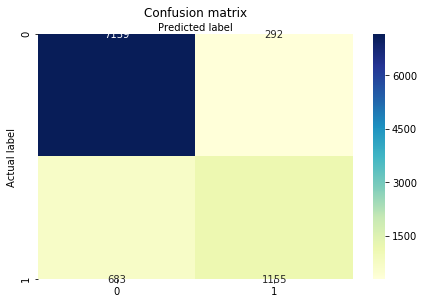

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8948106591865358
Precision: 0.7982031789910159
Recall: 0.6284004352557128
F1: 0.7031963470319634


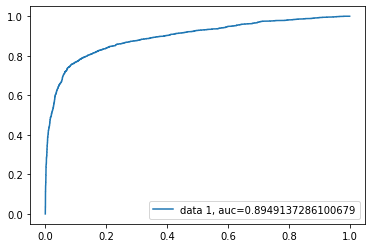

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic with CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test,y_test)

0.8950264321933327

In [ ]:
y_pred_L=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_L))
print("Precision:",metrics.precision_score(y_test, y_pred_L))
print("Recall:",metrics.recall_score(y_test, y_pred_L))
print("F1:",metrics.f1_score(y_test, y_pred_L))

Accuracy: 0.8950264321933327
Precision: 0.7984817115251898
Recall: 0.6294885745375408
F1: 0.703985397018558


Text(0.5, 257.44, 'Predicted label')

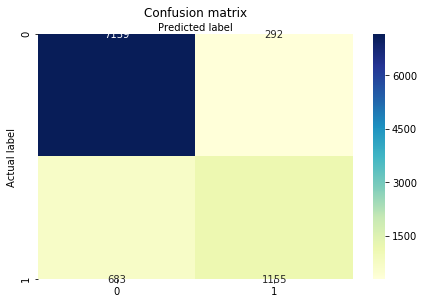

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

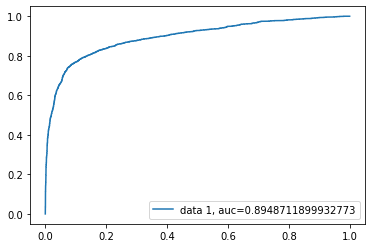

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_train.value_counts()

In [ ]:
y_train.describe()

# Stochastic gradient



In [ ]:
from sklearn.linear_model import SGDClassifier

Scaling the data before fitting in the model


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

Finding the best number of iterations for the global minima


C:\Users\ronal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


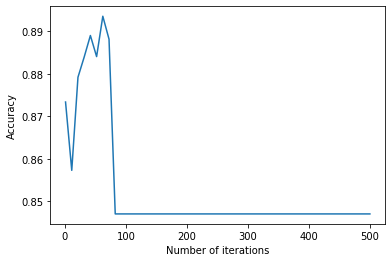

In [ ]:
#from numpy imprort linspace
n_iter = np.linspace(1,500)
scores = np.array([])
for n in n_iter:
  model = SGDClassifier(loss="log", penalty="l1", max_iter=n, random_state=0)
  model.fit(X_train, y_train)
  scores=np.append(scores,model.score(X_test, y_test))
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

C:\Users\ronal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


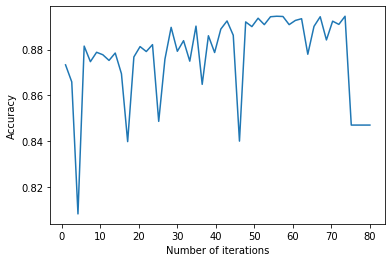

In [ ]:
#from numpy imprort linspace
n_iter = np.linspace(1,80)
scores = np.array([])
for n in n_iter:
  model = SGDClassifier(loss="log", penalty="l1", max_iter=n, random_state=0)
  model.fit(X_train, y_train)
  scores=np.append(scores,model.score(X_test, y_test))
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model = SGDClassifier(loss="log", penalty="l1", max_iter=80)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
#model1 = SGDRegressor(loss="log", penalty="l1", max_iter=100)

In [ ]:
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=80,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_S= model.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_S)
cnf_matrix

array([[6965,  466],
       [ 563, 1275]], dtype=int64)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_S))
print("Precision:",metrics.precision_score(y_test, y_pred_S))
print("Recall:",metrics.recall_score(y_test, y_pred_S))
print("F1:",metrics.f1_score(y_test, y_pred_S))

Accuracy: 0.8889847880030208
Precision: 0.7323377369327972
Recall: 0.6936887921653971
F1: 0.7124895222129086


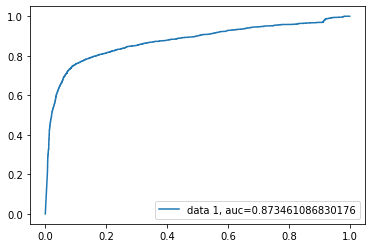

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Precision recall score 

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred1)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.57


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_5=cross_val_score(model,X_test, y_test,cv=5)
scores_5

In [ ]:
from sklearn.model_selection import cross_val_predict

Stochastic gradient descent for CV=5

In [ ]:
pred_5 = cross_val_predict(model,X_test,y_test,cv=5)

In [ ]:
pred

In [ ]:
scores_5.mean()

0.8771156110202488

In [ ]:
%pip install parfit

In [ ]:
%pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

# SGD classifier Ridge and Lass and tunning the parameter for optimal alpha thats learning rate 

We have used grid search to find the optimum paramters 

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    5.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


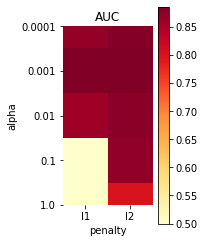

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0], # learning rate
    #'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l1','l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)
best_model, best_score, all_models, all_scores = pf.bestFit(SGDClassifier, paramGrid, 
     X_train, y_train, X_test, y_test, 
     metric=roc_auc_score, scoreLabel='AUC')
print(best_model)
#print(bestModel

Copying the above parameter for the below

In [ ]:
model2= SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model3= SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=n,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

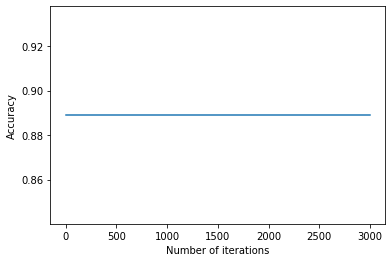

In [ ]:
#from numpy imprort linspace
max_iter = np.linspace(1,3000)
scores = np.array([])
for n in n_iter:
    model2
    model2.fit(X_train, y_train)
    scores=np.append(scores,model.score(X_test, y_test))
plt.plot(max_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model2.fit(X_train,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred2= model2.predict(X_test)


In [ ]:
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2


array([[7101,  330],
       [ 743, 1095]], dtype=int64)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("F1:",metrics.f1_score(y_test, y_pred2))


Accuracy: 0.8842377818534901
Precision: 0.7684210526315789
Recall: 0.5957562568008705
F1: 0.6711615078148943


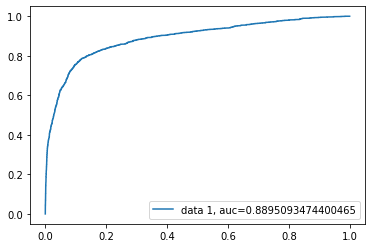

In [ ]:
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()